In [25]:
## Here we will make a program to classify digits from 0 to 9 using SVM Model
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.datasets import load_iris
import numpy as np

In [11]:
iris = load_iris()
dir(iris)  ## important command to know all the features asscociated with the dataset

['DESCR',
 'data',
 'feature_names',
 'filename',
 'frame',
 'target',
 'target_names']

In [16]:
##covert it to dataframe
df = pd.DataFrame(iris.data, columns = iris.feature_names)
df.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


In [18]:
## now adding target column to our data
df['target'] = iris.target
df.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0


In [19]:
## Every column has one associated target name
iris.target_names

array(['setosa', 'versicolor', 'virginica'], dtype='<U10')

In [20]:
## this different target names are associated with different target value
df['target'].value_counts()

## From this it is very clear 0,1,2 each have 50 values

0    50
1    50
2    50
Name: target, dtype: int64

In [22]:
df['target'].describe()

count    150.000000
mean       1.000000
std        0.819232
min        0.000000
25%        0.000000
50%        1.000000
75%        2.000000
max        2.000000
Name: target, dtype: float64

In [21]:
## applying target names to target
df['flower'] = df['target'].apply(lambda x: iris.target_names[x])
df.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target,flower
0,5.1,3.5,1.4,0.2,0,setosa
1,4.9,3.0,1.4,0.2,0,setosa
2,4.7,3.2,1.3,0.2,0,setosa
3,4.6,3.1,1.5,0.2,0,setosa
4,5.0,3.6,1.4,0.2,0,setosa


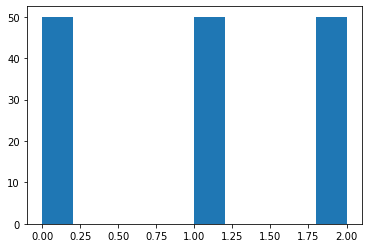

In [43]:
plt.hist(df['target'])
y,x = np.histogram(df['target'])
x = (x[:-1]+x[1:])/2
#print(x)
#print(y)
#plt.hist(y, bins =3)

In [51]:
## how to know position of values of target
df[df['target']==1].head()
## put head and tail to know about the range of data
df0 = df[:50]
df1 = df[50:100]
df2 = df[100:150] 

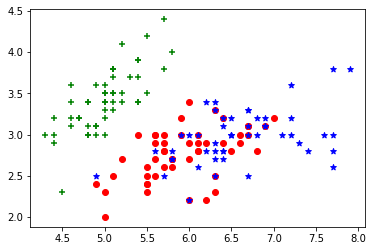

In [53]:
##Now we want to see how our data is distributed 
%matplotlib inline
plt.scatter(df0['sepal length (cm)'],df0['sepal width (cm)'], color = 'green', marker= '+')
plt.scatter(df1['sepal length (cm)'],df1['sepal width (cm)'], color = 'red', marker= 'o')
plt.scatter(df2['sepal length (cm)'],df2['sepal width (cm)'], color = 'blue', marker= '*')


In [82]:
## Now using SVM model we want to classify our data
from sklearn.model_selection import train_test_split
X = df.drop(['flower', 'target'], axis ='columns')
Y = df['target']
X_train, X_test,Y_train, Y_test = train_test_split(X,Y, random_state =1)

In [87]:
from sklearn.svm import SVC
model = SVC(C = 100, kernel = 'rbf', gamma = 1)  ## using different value of  C, kernel, gamma one can get more accurate model

In [88]:
model.fit(X_train, Y_train)

SVC(C=100, gamma=1)

In [89]:
#dir(SVC) ## these are allfunction which can be used to get the information related to SVC model

In [90]:
model.score(X_test,Y_test)

0.9736842105263158

# Plot confusion matrix

[[13  0  0]
 [ 0 15  1]
 [ 0  0  9]]


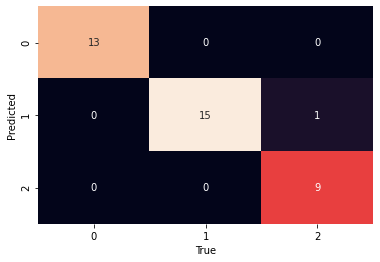

In [101]:
from sklearn.metrics import confusion_matrix
import seaborn as sns
Y_pred = model.predict(X_test)
cm  = confusion_matrix(Y_test, Y_pred)
print(cm)
sns.heatmap(cm, cbar = False, annot  = True)
plt.xlabel('True')
plt.ylabel ('Predicted')
plt.show()

# Classification report

In [102]:
from sklearn.metrics import classification_report

print(classification_report(Y_test, Y_pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        13
           1       1.00      0.94      0.97        16
           2       0.90      1.00      0.95         9

    accuracy                           0.97        38
   macro avg       0.97      0.98      0.97        38
weighted avg       0.98      0.97      0.97        38

